# Monte Carlo sampling with UQpy

Authors: Dimitris G. Giovanis, Andrew Solanto  
Date: February 10, 2022  
UQpy Version 4.0

We'll be using UQpy's Monte Carlo sampling in conjunction with its normal distribution functionalities. We also use Matplotlib to display results graphically.

Additionally, this demonstration opts to use Numpy's random state management to ensure that results are reproducible between notebook runs.

In [11]:
from UQpy.sampling import MonteCarloSampling
from UQpy.distributions import Normal

import matplotlib.pyplot as plt

from numpy.random import RandomState

We'll start by constructing two identical standard normal distributions `dist1` and `dist2`.

In [12]:
dist1 = dist2 = Normal()

Next, we'll construct a `MonteCarloSampling` object `mc` to generate random samples following those distributions. Here, we specify an optional initial number of samples `nsamples` to be generated at the object's construction.

For the purposes of this demonstration, we also supply a random seed `random_state`.

In [13]:
mc = MonteCarloSampling(distributions=[dist1, dist2],
                        nsamples=5,
                        random_state=RandomState(123))

print(mc.samples)

[[-1.0856306   1.65143654]
 [ 0.99734545 -2.42667924]
 [ 0.2829785  -0.42891263]
 [-1.50629471  1.26593626]
 [-0.57860025 -0.8667404 ]]


To generate more samples on `montecarlo` after construction, we call `montecarlo.run` and once again specify `nsamples`.

In [14]:
mc.run(nsamples=2, random_state=RandomState(23))

print(mc.samples)

[[-1.0856306   1.65143654]
 [ 0.99734545 -2.42667924]
 [ 0.2829785  -0.42891263]
 [-1.50629471  1.26593626]
 [-0.57860025 -0.8667404 ]
 [ 0.66698806 -0.77761941]
 [ 0.02581308  0.94863382]]


We can apply the probability integral transformation on the samples to yield similar samples from the uniform distribution. We call `mc.transform_u01`, from which results are stored in the `samplesU01` attribute.

In [15]:
mc.transform_u01()

print(mc.samplesU01)

[[0.13882123 0.95067527]
 [0.84070157 0.00761886]
 [0.61140334 0.3339934 ]
 [0.06599577 0.89723205]
 [0.28142947 0.19304213]
 [0.74761012 0.21839671]
 [0.51029679 0.82859656]]


We can visualize the (untransformed) samples by plotting them on axes of each distribution's range.

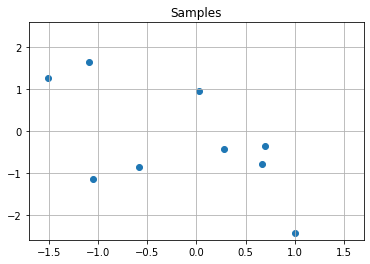

In [33]:
fig, ax = plt.subplots()
plt.title('Samples')

plt.scatter(x = mc.samples[:, 0],
            y = mc.samples[:, 1],
            marker = 'o')

plt.setp(ax, xlim=(-1.7, 1.7), ylim=(-2.6, 2.6))
ax.yaxis.grid(True)
ax.xaxis.grid(True)

As well, we can visualize each distribution's sample densities via histograms.

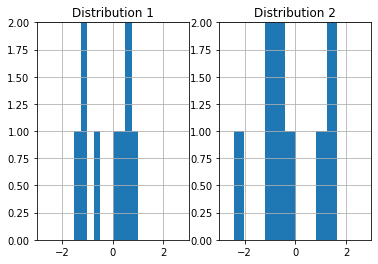

In [36]:
fig, ax = plt.subplots(1, 2)

for i in (0, 1):
    ax[i].set_title('Distribution ' + str(i + 1))
    ax[i].hist(mc.samples[:, i])
    ax[i].yaxis.grid(True)
    ax[i].xaxis.grid(True)

plt.setp(ax, xlim=(-3, 3), ylim=(0, 2));

---

TODO: are these remaining examples necessary?

In [18]:
mc.run(nsamples=2)

print(mc.samples)

[[-1.0856306   1.65143654]
 [ 0.99734545 -2.42667924]
 [ 0.2829785  -0.42891263]
 [-1.50629471  1.26593626]
 [-0.57860025 -0.8667404 ]
 [ 0.66698806 -0.77761941]
 [ 0.02581308  0.94863382]
 [ 0.70167179 -0.36754812]
 [-1.05108156 -1.13745969]]


In [19]:
mc.transform_u01()

print(mc.samplesU01)

[[0.13882123 0.95067527]
 [0.84070157 0.00761886]
 [0.61140334 0.3339934 ]
 [0.06599577 0.89723205]
 [0.28142947 0.19304213]
 [0.74761012 0.21839671]
 [0.51029679 0.82859656]
 [0.75855807 0.3566051 ]
 [0.14661057 0.12767308]]



[[ 2.21206564  1.21635688]
 [-0.09732382  2.8152297 ]
 [-1.30600471  4.1038246 ]
 [ 0.50407636  2.54147535]
 [ 1.61407521  1.54649951]]


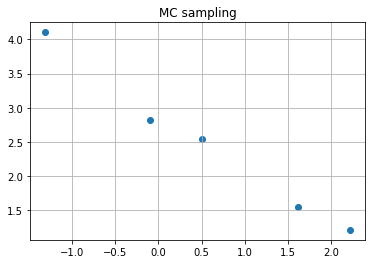


MCS extended samples: [[ 2.21206564  1.21635688]
 [-0.09732382  2.8152297 ]
 [-1.30600471  4.1038246 ]
 [ 0.50407636  2.54147535]
 [ 1.61407521  1.54649951]
 [ 4.74349145 -0.05303308]
 [ 3.26378416  1.58681057]]


In [ ]:
# We are going to run MCS for a multivariate normal distribution random variables.
from UQpy.distributions import MultivariateNormal
dist = MultivariateNormal(mean=[1., 2.], cov=[[4., -0.9], [-0.9, 1.]])

x1 = MonteCarloSampling(distributions=dist, nsamples=5, random_state=np.random.RandomState(456))
print()
print(x1.samples)

# plot the samples
fig, ax = plt.subplots()
plt.title('MC sampling')
plt.scatter(x1.samples[:, 0], x1.samples[:, 1], marker='o')
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()

# Use the MCS.run method in order to add 2 samples in the existing ones.
x1.run(nsamples=2)
print()
print('MCS extended samples:', x1.samples)

# Use the MCS.transform_u01 method in order transform the samples to the Uniform [0,1] space.
# However, in order to use this method all distributions need to have a ``cdf`` method.
# For example, in this case the MVNormal distribution does not have a ``cdf`` method so the code
# will give an error.
x1.transform_u01()

In [ ]:
# We are going to run MCS for a multivariate normal distribution and a standard normal distribution.
x2 = MonteCarloSampling(distributions=[dist1, dist], nsamples=5, random_state=np.random.RandomState(789))
print()
print('MCS samples:', x2.samples)

print(len(x2.samples))
print(len(x2.samples[0]))

# Extract samples for the multivariate distribution
samples = np.zeros(shape=(len(x2.samples), len(x2.samples[1])))
for i in range(len(x2.samples)):
    samples[i, :] = x2.samples[i][1]
print()
print('MVNormal samples:', samples)

# Use the MCS.run method in order to add 2 samples in the existing ones.
x2.run(nsamples=2)
print()
print('MCS extended samples:', x2.samples)


MCS samples: [[array([-1.1081114]) array([2.9781381 , 1.51253378])]
 [array([-0.72571863]) array([1.96173102, 0.89589751])]
 [array([0.52280433]) array([-0.91034353,  3.25303316])]
 [array([1.2344419]) array([-1.75177129,  2.37998095])]
 [array([0.09689585]) array([1.43288471, 1.1029768 ])]]
5
2

MVNormal samples: [[ 2.9781381   1.51253378]
 [ 1.96173102  0.89589751]
 [-0.91034353  3.25303316]
 [-1.75177129  2.37998095]
 [ 1.43288471  1.1029768 ]]

MCS extended samples: [[array([-1.1081114]) array([2.9781381 , 1.51253378])]
 [array([-0.72571863]) array([1.96173102, 0.89589751])]
 [array([0.52280433]) array([-0.91034353,  3.25303316])]
 [array([1.2344419]) array([-1.75177129,  2.37998095])]
 [array([0.09689585]) array([1.43288471, 1.1029768 ])]
 [array([-1.75326594]) array([3.37476301, 2.48107982])]
 [array([0.26386684]) array([4.51310267, 1.47752039])]]


d:\code\uqpy\src\UQpy\sampling\MonteCarloSampling.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.x.append(np.array(y))


In [ ]:
# Draw samples from a continuous and discrete distribution
from UQpy.distributions import Binomial
dist3 = Binomial(n=5, p=0.4)
x3 = MonteCarloSampling(distributions=[dist1, dist3], nsamples=5)

print()
print('MCS samples:', x3.samples)


MCS samples: [[[ 0.09892052]
  [ 4.        ]]

 [[ 0.66902676]
  [ 3.        ]]

 [[-0.89522328]
  [ 3.        ]]

 [[-0.14470493]
  [ 1.        ]]

 [[ 1.17915057]
  [ 0.        ]]]
